#Oasis Infobyte Internship – Task 3

**Car Price Prediction**

**Domain:** Data Science

**Internship Platform:** Oasis Infobyte


#Introduction

Car price prediction is an important application of machine learning in the automobile industry.
The price of a car depends on several factors such as the year of manufacture, fuel type, transmission type, selling price, ownership history, and present showroom price.

In this project, machine learning techniques are used to analyze the dataset and build models that can predict the selling price of cars accurately.

### Dataset Description
The dataset contains details like selling price, fuel type, transmission, and owner count.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [12]:
df = pd.read_csv('/content/car data.zip')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [31]:
df.shape
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Columns: 106 entries, Year to Transmission_Manual
dtypes: bool(101), float64(2), int64(3)
memory usage: 41.6 KB


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#Read the Dataset

In [32]:
data=pd.read_csv('/content/car data.zip')
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [33]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [34]:
data.shape

(301, 9)

#Data Cleaning and Anaysis of Data

In [35]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [36]:
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [38]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#Training the model

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x=data.iloc[:, :-1]
x

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual


In [41]:
y=data.iloc[:, -1]
y

,Owner
0,0
1,0
2,0
3,0
4,0
...,...
296,0
297,0
298,0
299,0


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [43]:
x_train

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
293,city,2010,3.25,9.900,38000,Petrol,Dealer,Manual
93,fortuner,2015,23.00,30.610,40000,Diesel,Dealer,Automatic
47,wagon r,2006,1.05,4.150,65000,Petrol,Dealer,Manual
175,Hero Honda CBZ extreme,2011,0.38,0.787,75000,Petrol,Individual,Manual
84,innova,2005,3.49,13.460,197176,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...,...
58,etios g,2014,4.10,6.800,39485,Petrol,Dealer,Manual
87,corolla altis,2012,5.90,13.740,56000,Petrol,Dealer,Manual
197,Honda CB twister,2010,0.16,0.510,33000,Petrol,Individual,Manual
174,Honda CB Unicorn,2015,0.38,0.720,38600,Petrol,Individual,Manual


In [44]:
x_test

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual
208,i20,2017,7.90,8.10,3435,Petrol,Dealer,Manual
18,wagon r,2015,3.25,5.09,35500,CNG,Dealer,Manual
43,dzire,2014,5.50,8.06,45780,Diesel,Dealer,Manual
241,xcent,2015,4.75,7.13,35866,Petrol,Dealer,Manual
...,...,...,...,...,...,...,...,...
246,i20,2012,3.75,6.79,35000,Petrol,Dealer,Manual
156,TVS Sport,2017,0.48,0.52,15000,Petrol,Individual,Manual
11,ciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic


In [45]:
y_train

,Owner
293,0
93,0
47,0
175,0
84,0
...,...
58,1
87,0
197,0
174,0


In [46]:
y_test

,Owner
294,0
208,0
18,0
43,0
241,1
...,...
246,0
156,0
11,0
64,0


In [47]:
x_train = x_train.iloc[:, 1:]
x_test = x_test.iloc[:, 1:]

#Exploratory Data Analysis

Analyzing relationship between present price and selling price.


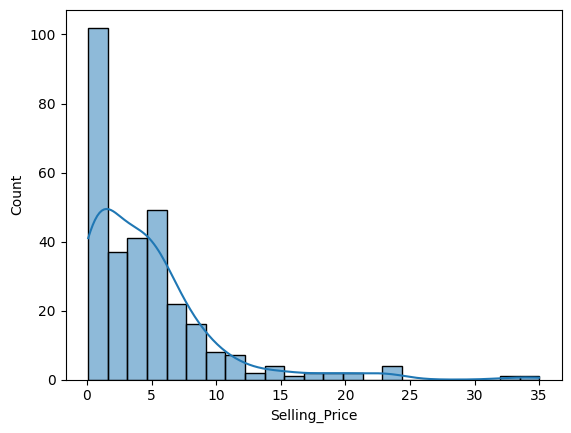

In [15]:
sns.histplot(df['Selling_Price'], kde=True)
plt.show()

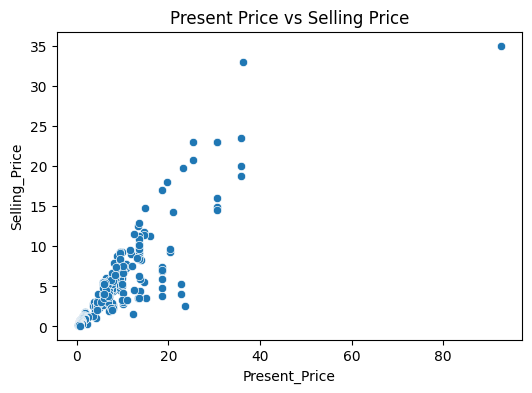

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Present_Price'], y=df['Selling_Price'])
plt.title("Present Price vs Selling Price")
plt.show()


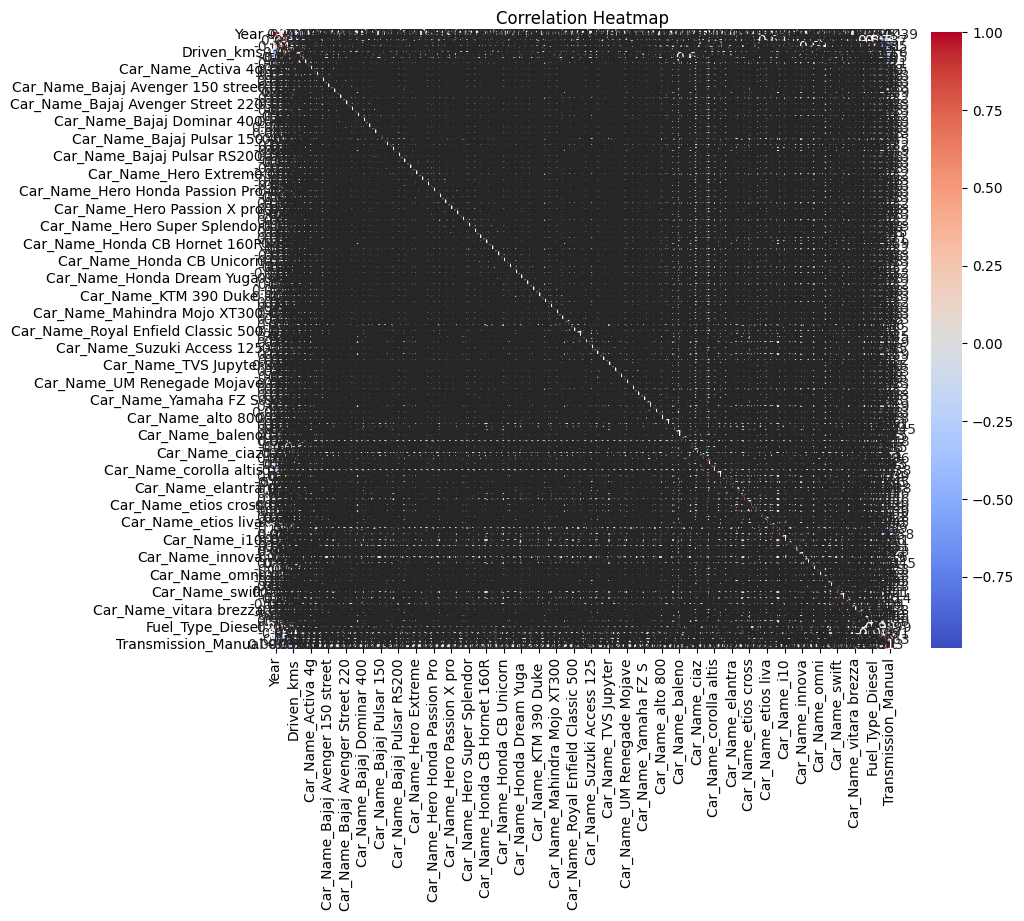

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()


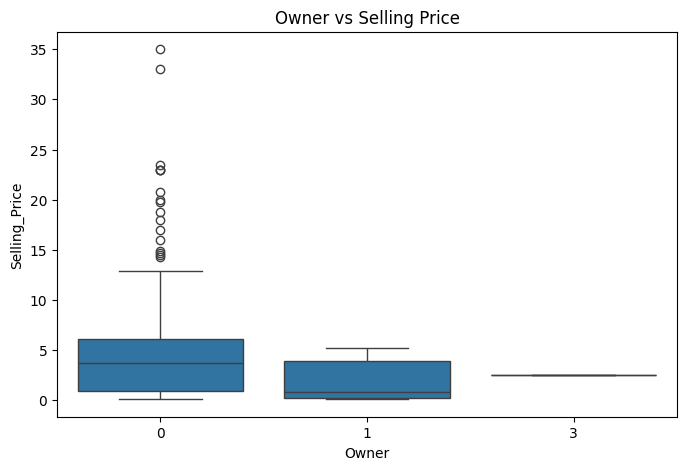

In [66]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Owner', y='Selling_Price', data=df)
plt.title("Owner vs Selling Price")
plt.show()


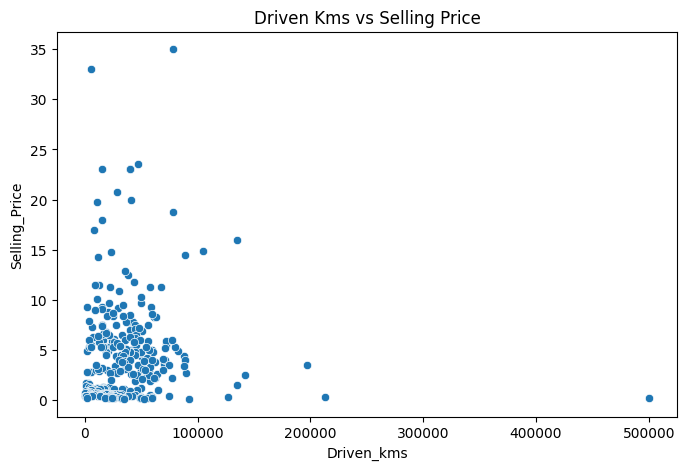

In [67]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title("Driven Kms vs Selling Price")
plt.show()


## Data Preprocessing
Categorical features are converted into numerical format.


In [21]:
df = pd.get_dummies(df, drop_first=True)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Selection

Separating input features and target variable.


In [20]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


### Linear Regression Model

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(r2_score(y_test, y_pred_lr))

0.5997023481243802


In [26]:
y_pred_lr = lr.predict(X_test)

print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
MAE: 2.0365174791070033
MSE: 9.221090393054562
RMSE: 3.0366248357435532
R2 Score: 0.5997023481243802


### Random Forest Model

In [27]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [28]:
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
MAE: 0.5907950819672131
MSE: 0.7524023742622952
RMSE: 0.8674113062799534
R2 Score: 0.9673373873539192


#Observation

Selling price decreases as vehicle age and driven kilometers increase.

Vehicles with higher present price have higher selling price.

Diesel and automatic vehicles generally have higher resale value.

Cars sold by dealers are priced higher than individual sellers.

Vehicles with fewer owners have better resale value.

#Conclusion

The selling price of a vehicle mainly depends on present price, year, kilometers driven, transmission type, and ownership.
These factors show clear relationships in the visualizations and can be effectively used for price prediction models.